# Predicting Medical Insurance Costs - Kaggle
- 'https://www.kaggle.com/datasets/mirichoi0218/insurance'
- Wrangling, EDA, Linear Modeling

In [57]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# read in data
df = pd.read_csv('insurance.csv')

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Wrangling

In [60]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns

The Sex and Smoker columns can be binarized before modeling

The Region column needs to be explored before we change it to a numerical form

In [61]:
# check unique values of the Region column
# determine the distribution of the Region Column

df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

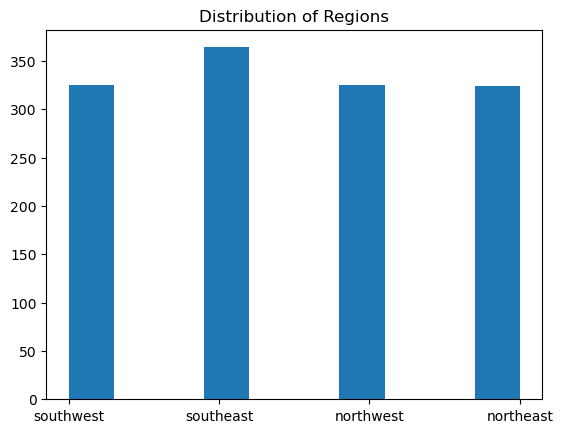

In [62]:
# plot distribution of region column
plt.figure()
plt.hist(df['region'])
plt.title('Distribution of Regions')
plt.show()

The distribution of counts is even across regions

In [63]:
# Check which columns have NaN values
#.isna() returns a dataframe of T/F for any element that is missing
#.any() tells us if there are any Trues in that column
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [64]:
# check for duplicated rows
df.duplicated().sum()

1

In [65]:
# look at duplicated row
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


There seems to be a duplicated row?

This may be a duplication or 2 males with the same age/bmi/region with the same insurance costs.

I will remove this, it is just 1 data point

In [66]:
df.drop_duplicates(inplace = True)

In [67]:
df.duplicated().sum()

0

### So far
- Checked Missing Values (there are non)
- Check duplicates (droped 1 observation)

### Turn categorical columns into numerical columns
- Sex into binary
- Smoker into binary
- Region into dummy variables


In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Turn the sex column into a binary column for modeling. I will create a new 'male' column and designate a 1 for male and 0 for female

In [69]:
# Convert the sex column into a binary column using np.where(condition, true, false)
df['male'] = np.where(df['sex'] == 'male', 1, 0)

In [70]:
# Compare the sex column to the new 'male' column (sanity check)
# view the first 8 observations
df[['sex', 'male']].head(8)

,sex,male
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1
5,female,0
6,female,0
7,female,0


We see that our female values in [sex] are now 0 in our new [male] column. <br>
Additionally our male values in [sex] are now 1 in our new [male] column. <br>
We can do the same for the [smoker] column

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [72]:
df['smoker_yes'] = np.where(df['smoker'] == 'yes', 1, 0)
df[['smoker', 'smoker_yes']].head(5)

,smoker,smoker_yes
0,yes,1
1,no,0
2,no,0
3,no,0
4,no,0


The smoker column has been binarized <br>
Now we need to generate dummy columns for the region column

In [73]:
# concat old df with a df of dummmy columns created from the region column
df = pd.concat([df, pd.get_dummies(df['region'])], axis = 1)

In [74]:
# check new DF
df

,age,sex,bmi,children,smoker,region,charges,male,smoker_yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0,1


We can drop the old columns in our new dataframe, and keep the new numerical columns.
We also need to drop one dummy variable to avoid multicolinearity and reduce redundancy

In [75]:
df = df.drop(['sex', 'smoker', 'region', 'southwest'], axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   bmi         1337 non-null   float64
 2   children    1337 non-null   int64  
 3   charges     1337 non-null   float64
 4   male        1337 non-null   int32  
 5   smoker_yes  1337 non-null   int32  
 6   northeast   1337 non-null   uint8  
 7   northwest   1337 non-null   uint8  
 8   southeast   1337 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), uint8(3)
memory usage: 66.6 KB


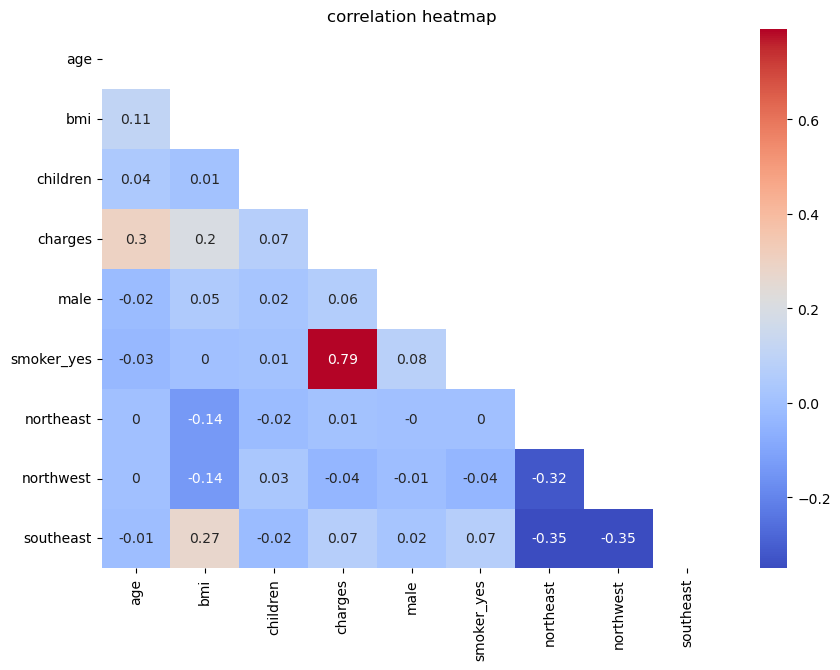

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr().round(2), annot = True, cmap = 'coolwarm', mask = np.triu(df.corr()) )
plt.title('correlation heatmap')
plt.show()

In [82]:
from scipy import stats
# hypothesis test
stats.pearsonr(df['smoker_yes'], df['charges'])

PearsonRResult(statistic=0.7872343672800317, pvalue=1.4067220949373763e-282)

In [83]:
# dependent variable = [charges]
# indepdendent variables = all numeric columns
y_linear = df['charges']

x_linear = df.select_dtypes(include=np.number)
x_linear.drop(columns = 'charges', inplace = True)

In [84]:
x_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   bmi         1337 non-null   float64
 2   children    1337 non-null   int64  
 3   male        1337 non-null   int32  
 4   smoker_yes  1337 non-null   int32  
 5   northeast   1337 non-null   uint8  
 6   northwest   1337 non-null   uint8  
 7   southeast   1337 non-null   uint8  
dtypes: float64(1), int32(2), int64(2), uint8(3)
memory usage: 56.1 KB


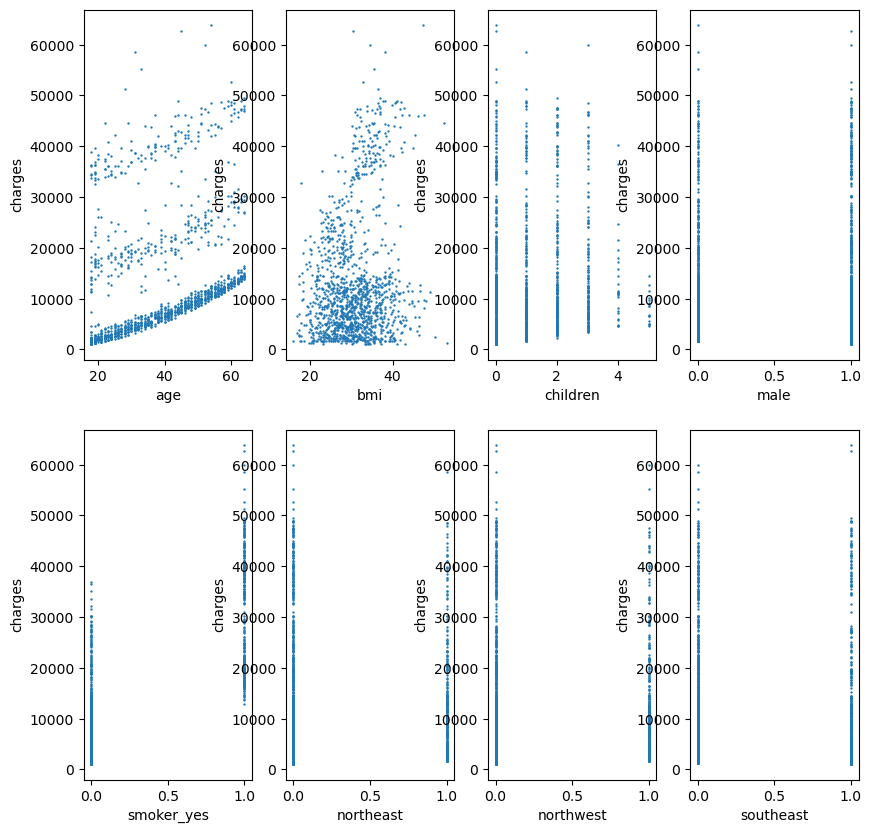

In [92]:
# check if there is a relationship between the variables

plt.subplots(2,4, figsize=(10, 10))
for i, col in enumerate(x_linear.columns, start=1):
    plt.subplot(2,4,i)
    plt.scatter(x=x_linear[col], y = y_linear, s = 0.5)
    plt.xlabel(col)
    plt.ylabel('charges')
plt.show()


charges seems to be linearly increases with age

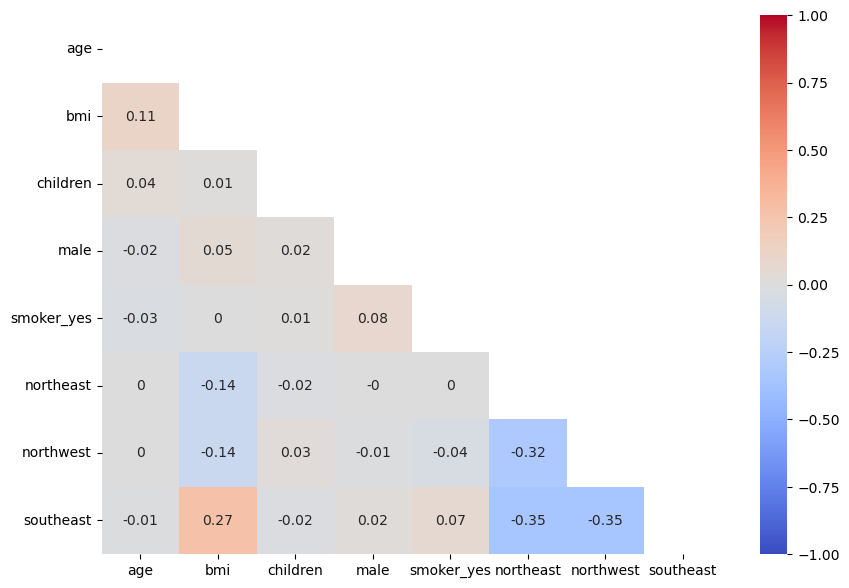

In [93]:
# check for multi-colinearity

plt.figure(figsize=(10,7))
sns.heatmap(x_linear.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(x_linear.corr()) )
plt.show()

In [94]:
# import package
import statsmodels.api as sm

# add in our intercept
x_linear_constant = sm.add_constant(x_linear) 

# Instantiate Model
linear_mod = sm.OLS(y_linear, x_linear_constant)

# Fit Model
linear_mod = linear_mod.fit()

# Look at summary
linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        14:56:30   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.29e+04   1021.381    -12.627      0.000   -1.49e+04   -1.09e+04
age          256.7646     11.912     21.555      0.000     233.396     280.133
bmi          339.2504     28.611     11.857      0.000     283.122     395.379
children     474.8205    137.897      3.443      0.001     204.301     745.340
male        -129.4815    333.195     -0.389      0.698    -783.128     524.165
smoker_yes  2.385e+04    413.348     57.693      0.000     2.3e+04    2.47e+04
northeast    960.0814    478.106      2.008      0.045      22.156    1898.007
northwest    610.8549    477.758      1.279      0.201    -326.387    1548.097
southeast    -75.1842    470.810     -0.160      0.873    -998.797     848.428
==============================================================================
Omnibus:                      299.816   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.552
Skew:                           1.211   Prob(JB):                    2.53e-156
Kurtosis:                       5.646   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#extract residuals
linear_mod_resids = linear_mod.resid

#extract fitted values
linear_mod_fittedvals = linear_mod.fittedvalues

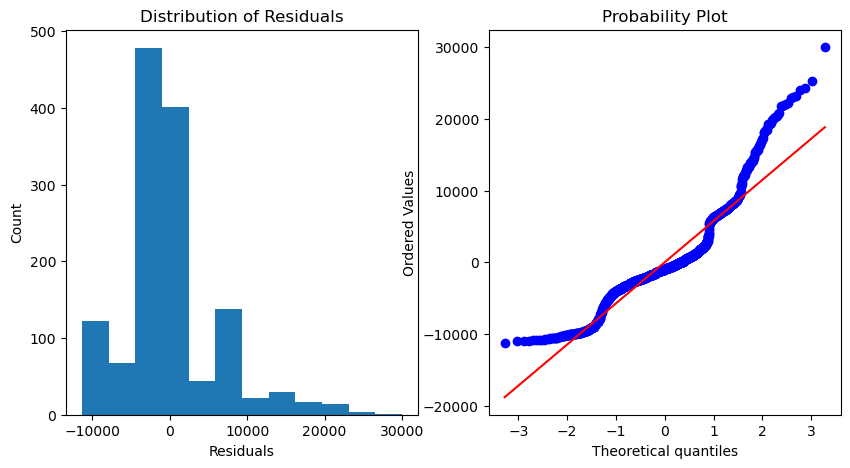

In [96]:
plt.subplots(1,2, figsize =(10,5))

plt.subplot(1,2,1)
plt.hist(linear_mod_resids, bins = 12)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Count')

plt.subplot(1,2,2)
stats.probplot(linear_mod_resids, dist="norm", plot = plt)

plt.show()

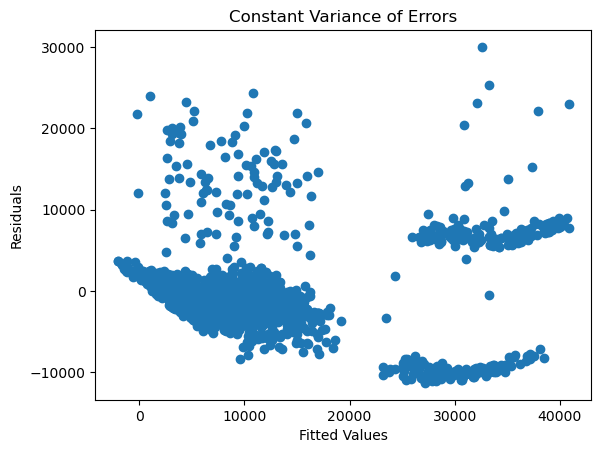

In [97]:
plt.figure()
plt.scatter(linear_mod_fittedvals, linear_mod_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Constant Variance of Errors')
plt.show()